In [4]:
import numpy as np
import clima_anom as ca

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [13]:
data_dir = '/mnt/Data/Data/GLM/SA/Grid/GLM_2019_03_15min_05x05.nc'
data = ca.read_netcdf(data_dir,2)
lat = data['lat']
lon = data['lon']
tim = data['time']
flash = data['flash']

lon2d, lat2d = np.meshgrid(lon, lat)

flash_sum = np.sum(flash,axis=0)
flash_mean = np.mean(flash,axis=0)

lat : (110,)
lon : (110,)
time : (2976,)
flash : (2976, 110, 110)


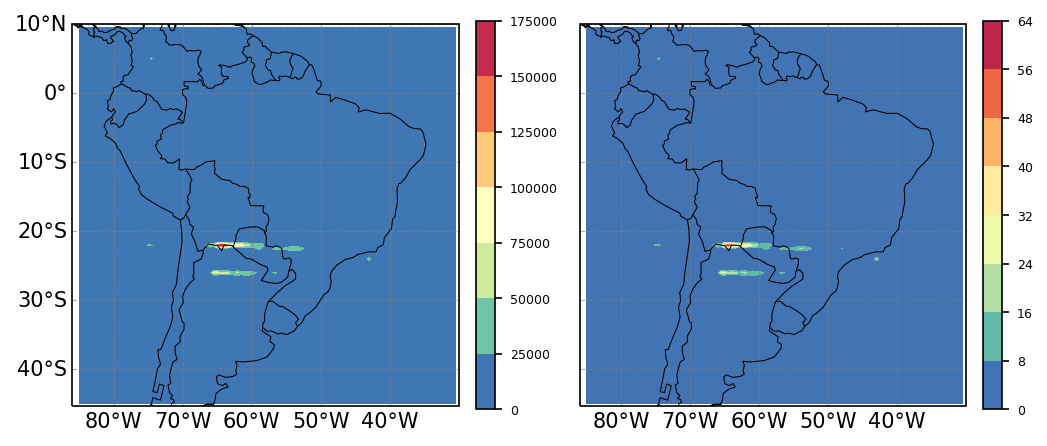

In [14]:
levels = np.arange(2,13,1)
levels = None
cmap = plt.cm.Spectral_r

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(8,4),dpi=150)
gs = gridspec.GridSpec(1,2)

ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.coastlines()
ax1.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
ax1.set_extent([-86,-30,-42,9])
a1 = ax1.contourf(lon2d,lat2d,flash_sum,cmap=cmap,levels=levels)
gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
cbar1 = plt.colorbar(a1,fraction=0.046, pad=0.04)
cbar1.ax.tick_params(labelsize=6)

ax2 = plt.subplot(gs[0, 1], projection = proj)
ax2.coastlines()
ax2.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax2.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
ax2.set_extent([-86,-30,-42,9])
a2 = ax2.contourf(lon2d,lat2d,flash_mean,cmap=cmap,levels=levels)
gl = ax2.gridlines(crs=proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = False
gl.right_labels = False
cbar2 = plt.colorbar(a2,fraction=0.046, pad=0.04)
cbar2.ax.tick_params(labelsize=6)


In [20]:
def flash_hour_interval(data_in,time_vector,hour_start,hour_end):
    tmp = []
    _, nlat, nlon = np.shape(data_in)
    ntime = len(time_vector)

    for t in range(ntime):
        if time_vector[t].hour >= hour_start and time_vector[t].hour < hour_end:
            tmp.append(data_in[t,:,:].data)

    salida = np.zeros([len(tmp),nlat,nlon])
    for t in range(len(tmp)):
        salida[t] = tmp[t]

    salida_mean = np.mean(salida,axis=0)

    return salida, salida_mean

In [29]:
flash_6h = np.zeros([6,110,110])
for t in range(6):
    T_start = 4*t
    T_end = 4*t + 4
    print(f'Time: {T_start} to {T_end}')
    _, flash_6h[t,:,:] = flash_hour_interval(flash,tim,T_start,T_end)

Time: 0 to 4
Time: 4 to 8
Time: 8 to 12
Time: 12 to 16
Time: 16 to 20
Time: 20 to 24


/home/arturo/anaconda3/envs/AXE/lib/python3.9/site-packages/cartopy/mpl/style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


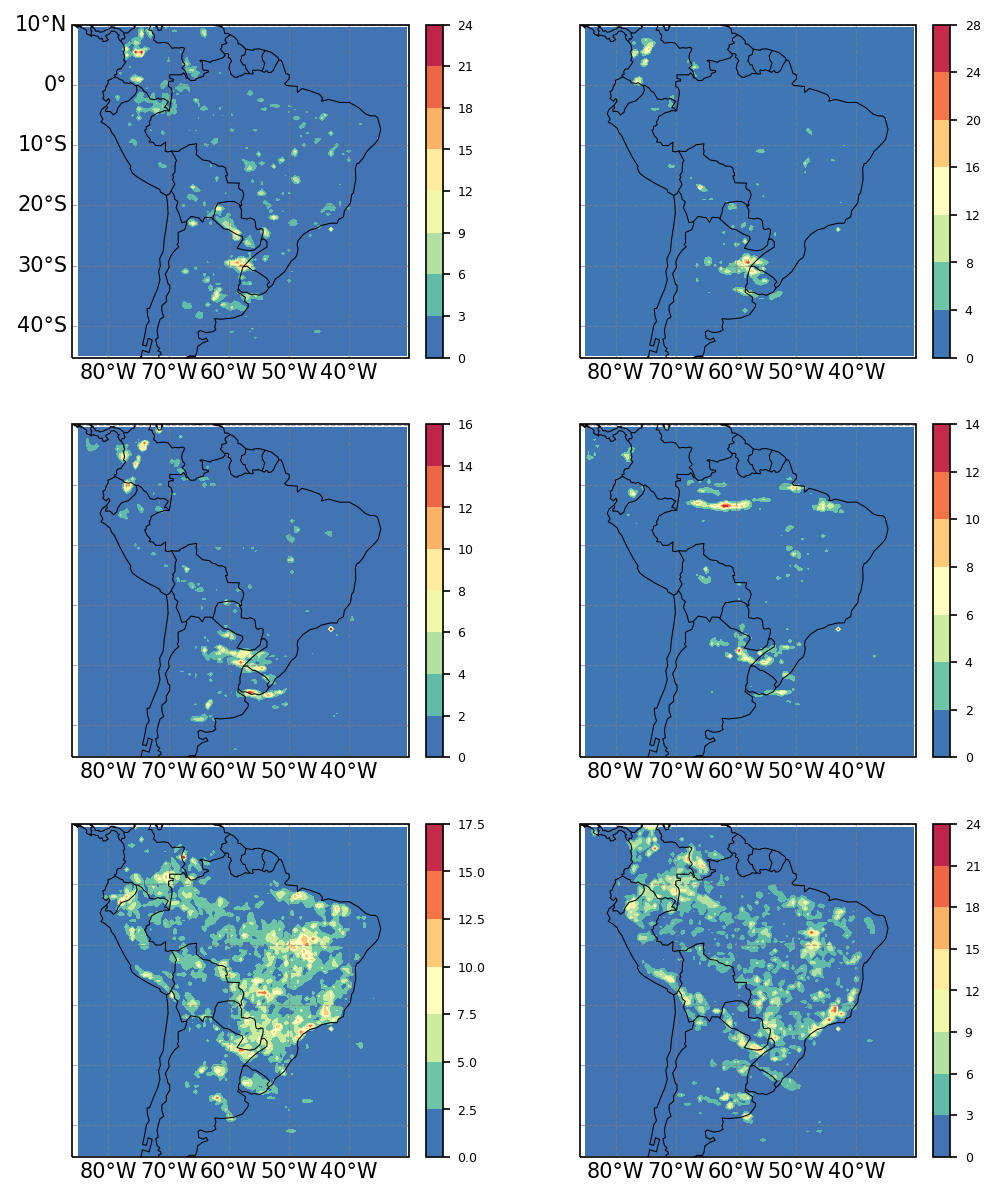

In [30]:
levels = None
cmap = plt.cm.Spectral_r

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(8,10),dpi=150)
gs = gridspec.GridSpec(3,2)

#==============================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.coastlines()
ax1.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
ax1.set_extent([-86,-30,-42,9])
a1 = ax1.contourf(lon2d,lat2d,flash_6h[0,:,:],cmap=cmap,levels=levels)
gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
cbar1 = plt.colorbar(a1,fraction=0.046, pad=0.04)
cbar1.ax.tick_params(labelsize=6)

#==============================================================================================================
ax2 = plt.subplot(gs[1, 0], projection = proj)
ax2.coastlines()
ax2.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax2.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
ax2.set_extent([-86,-30,-42,9])
a2 = ax2.contourf(lon2d,lat2d,flash_6h[2,:,:],cmap=cmap,levels=levels)
gl = ax2.gridlines(crs=proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = False
gl.right_labels = False
cbar2 = plt.colorbar(a2,fraction=0.046, pad=0.04)
cbar2.ax.tick_params(labelsize=6)

#==============================================================================================================
ax3 = plt.subplot(gs[2, 0], projection = proj)
ax3.coastlines()
ax3.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax3.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
ax3.set_extent([-86,-30,-42,9])
a3 = ax3.contourf(lon2d,lat2d,flash_6h[4,:,:],cmap=cmap,levels=levels)
gl = ax3.gridlines(crs=proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = False
gl.right_labels = False
cbar3 = plt.colorbar(a3,fraction=0.046, pad=0.04)
cbar3.ax.tick_params(labelsize=6)

#==============================================================================================================
ax4 = plt.subplot(gs[0, 1], projection = proj)
ax4.coastlines()
ax4.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax4.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
ax4.set_extent([-86,-30,-42,9])
a4 = ax4.contourf(lon2d,lat2d,flash_6h[1,:,:],cmap=cmap,levels=levels)
gl = ax4.gridlines(crs=proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = False
gl.right_labels = False
cbar4 = plt.colorbar(a4,fraction=0.046, pad=0.04)
cbar4.ax.tick_params(labelsize=6)

#==============================================================================================================
ax5 = plt.subplot(gs[1, 1], projection = proj)
ax5.coastlines()
ax5.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax5.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
ax5.set_extent([-86,-30,-42,9])
a5 = ax5.contourf(lon2d,lat2d,flash_6h[3,:,:],cmap=cmap,levels=levels)
gl = ax5.gridlines(crs=proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = False
gl.right_labels = False
cbar5 = plt.colorbar(a5,fraction=0.046, pad=0.04)
cbar5.ax.tick_params(labelsize=6)

#==============================================================================================================
ax6 = plt.subplot(gs[2, 1], projection = proj)
ax6.coastlines()
ax6.add_feature(cfeature.COASTLINE,linewidth=0.5,color='black',zorder=4)
ax6.add_feature(cfeature.BORDERS,linewidth=0.5,color='black',zorder=4)
ax6.set_extent([-86,-30,-42,9])
a6 = ax6.contourf(lon2d,lat2d,flash_6h[5,:,:],cmap=cmap,levels=levels)
gl = ax6.gridlines(crs=proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = False
gl.right_labels = False
cbar6 = plt.colorbar(a6,fraction=0.046, pad=0.04)
cbar6.ax.tick_params(labelsize=6)
